In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy
import numpy as np
from numpy import asarray


from os import listdir
from os.path import isfile, join
import os
import os.path

from pandas import read_csv
import pandas as pd

import math
import sys
import requests
import re
import tempfile
import seaborn as sns
import uuid
import calendar

from datetime import date
import datetime
from datetime import datetime

import os
from os import listdir
from os.path import isfile, join
import os.path

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.constraints import maxnorm

import sys
import requests
import re
import tempfile
import seaborn as sns
import uuid
import calendar

from pandas import read_csv
from pandas import DataFrame
from pandas import concat

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor

import joblib

import datetime
import calendar

sns.set_style("white")
plt.style.use('ggplot')
from pylab import rcParams
from matplotlib.dates import date2num
rcParams['figure.figsize'] = 14,3

In [2]:
from apps.main_module import MainModule
from apps.predictor_interface import PredictorInterface
from apps.model_factory import ModelFactory

from apps.linear_regression_predictor import LinearRegressionPredictor
from apps.lstm_predictor import LSTMPredictor
from apps.svr_predictor import SVRPredictor
from apps.rnn_predictor import RNNPredictor
from apps.random_forest_regressor_predictor import RandomForestRegressorPredictor
from apps.xgb_regressor_predictor import XGBRegressorPredictor

from apps.error_metrics import ErrorMetrics

from apps.time_utilities import TimeUtilities

In [3]:
mainModule = MainModule.getInstance()

Remove DB
Load DB
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\239d9f5c-f97e-11ea-82c9-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2ad5cb1a-f97e-11ea-9ed2-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2b364198-f97e-11ea-8783-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2ba21db4-f97e-11ea-bc11-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2c05dfee-f97e-11ea-9164-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2c7fa4b0-f97e-11ea-b00f-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2cf0fb36-f97e-11ea-9a30-181deaf44bd2
downloadFile
Successfully created the directory C:\Users\Oscar\AppData\Local\Temp\2d5cce50-f97e-11ea-9c7c-181deaf44bd2
downloadFile
Successfully crea

C:\Users\Oscar\Documents\cortex\src\apps\data_warehouse_controller.py:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\data_warehouse_controller.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

1
2
3
4
5
6
7
8
9
10
11


In [4]:
featureEngineering = mainModule.FeatureEngineering()
scalerService = mainModule.ScalerService()
dfFiltered = featureEngineering.getDataRaw()

In [5]:
dataWarehouseController = mainModule.DataWarehouseController()

In [6]:
dataProfiles = dataWarehouseController.getDataProfiles()
dataProfiles.head()

fecha      valor   tipo      tipo_docto  numero_factura  diff  \
0 2016-08-19  9224599.0  cargo         Factura               1   0.0   
1 2016-10-06  2411599.0  abono  Recibo de Caja               8  48.0   
2 2016-10-07  6813000.0  abono  Recibo de Caja               9   1.0   
0 2016-08-22   741356.0  cargo         Factura               2   0.0   
1 2016-10-19   741356.0  abono  Recibo de Caja              11  58.0   

   timeSinceStart numero_cargo  paymentFinished id        T  valorCargo  
0               0            1             True  0  2016T08   9224599.0  
1              48            1             True  0  2016T10   9224599.0  
2              49            1             True  0  2016T10   9224599.0  
0               0            2             True  0  2016T08    741356.0  
1              58            2             True  0  2016T10    741356.0

In [7]:
dataFiles = dataWarehouseController.getDataTable()
dataFiles.head()

tipo_docto  numero      fecha promedio    cargos abonos  nuevo_saldo  \
0    Factura       1 2016-08-19       49   9224599      0      9224599   
1    Factura       2 2016-08-22       58    741356      0      9965955   
2    Factura       3 2016-08-29       82  15389465      0     25355420   
3    Factura       4 2016-09-02      105   1512387      0     26867807   
4    Factura       5 2016-09-05       44   2093734      0     28961541   

                            enviado_a id  fileName       lat        lon  
0  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.428494 -76.516385  
1  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.428494 -76.516385  
2  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.428494 -76.516385  
3  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.428494 -76.516385  
4  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.428494 -76.516385

In [8]:
dfFiltered.head()

time_diff_bin_0  time_diff_bin_1  time_diff_bin_2  time_diff_bin_3  \
index                                                                        
201510                0                0                0                0   
201511                0                1                0                0   
201512                0                0                0                0   
201601                0                0                1                0   
201602                0                4                7                0   

        time_diff_bin_4  time_since_start_bin_0  time_since_start_bin_1  \
index                                                                     
201510                0                       0                       0   
201511                0                       1                       0   
201512                0                       0                       0   
201601                0                       1                       0   
201602                0                      11                       0   

        time_since_start_bin_2  time_since_start_bin_3  \
index                                                    
201510                       0                       0   
201511                       0                       0   
201512                       0                       0   
201601                       0                       0   
201602                       0                       0   

        time_since_start_bin_4  ...       y_v_2  y_p_2       y_v_3  y_p_3  \
index                           ...                                         
201510                       0  ...         0.0      0   8688300.0      1   
201511                       0  ...   8688300.0      1  31806259.0      1   
201512                       0  ...  31806259.0      1  30666322.0      1   
201601                       0  ...  30666322.0      1  30218526.0      1   
201602                       0  ...  30218526.0      1  30942349.0      1   

             y_v_4  y_p_4       y_v_5  y_p_5       y_v_6  y_p_6  
index                                                            
201510  31806259.0      1  30666322.0      1  30218526.0      1  
201511  30666322.0      1  30218526.0      1  30942349.0      1  
201512  30218526.0      1  30942349.0      1  43882137.0      1  
201601  30942349.0      1  43882137.0      1  42387017.0      1  
201602  43882137.0      1  42387017.0      1  23670412.0      1  

[5 rows x 148 columns]

In [9]:
rows = list(dfFiltered.index)
rows.sort()
limitDate = 201700

In [10]:
validationRows = rows[-6:]
firstTrainSetRows = [i for i in rows[:-6] if limitDate > i]
tempRows = [i for i in rows[:-6] if limitDate <= i]
splitRows=[{'id': array.min(), \
            'train': [i for i in rows if i < array.min()], \
            'test': list(array)} for array in np.array_split(tempRows, 4)]

In [11]:
splitRows, validationRows

([{'id': 201701,
   'train': [201510,
    201511,
    201512,
    201601,
    201602,
    201603,
    201604,
    201605,
    201606,
    201607,
    201608,
    201609,
    201610,
    201611,
    201612],
   'test': [201701,
    201702,
    201703,
    201704,
    201705,
    201706,
    201707,
    201708,
    201709]},
  {'id': 201710,
   'train': [201510,
    201511,
    201512,
    201601,
    201602,
    201603,
    201604,
    201605,
    201606,
    201607,
    201608,
    201609,
    201610,
    201611,
    201612,
    201701,
    201702,
    201703,
    201704,
    201705,
    201706,
    201707,
    201708,
    201709],
   'test': [201710,
    201711,
    201712,
    201801,
    201802,
    201803,
    201804,
    201805,
    201806]},
  {'id': 201807,
   'train': [201510,
    201511,
    201512,
    201601,
    201602,
    201603,
    201604,
    201605,
    201606,
    201607,
    201608,
    201609,
    201610,
    201611,
    201612,
    201701,
    201702,
    201703,


In [12]:
firstTrainSetRows

[201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612]

In [13]:
#dfTemp = dfFiltered[dfFiltered.index.isin(firstTrainSetRows)]
scalerService.fit(dfFiltered)
scalerService.saveStats()

In [14]:
df = scalerService.transform(dfFiltered)
df.head(3)

time_diff_bin_0  time_diff_bin_1  time_diff_bin_2  time_diff_bin_3  \
index                                                                        
201510        -0.219588        -0.981788        -1.004162        -0.227999   
201511        -0.219588        -0.860131        -1.004162        -0.227999   
201512        -0.219588        -0.981788        -1.004162        -0.227999   

        time_diff_bin_4  time_since_start_bin_0  time_since_start_bin_1  \
index                                                                     
201510        -0.272301               -0.984632               -0.748121   
201511        -0.272301               -0.889988               -0.748121   
201512        -0.272301               -0.984632               -0.748121   

        time_since_start_bin_2  time_since_start_bin_3  \
index                                                    
201510               -0.367781                -0.23218   
201511               -0.367781                -0.23218   
201512               -0.367781                -0.23218   

        time_since_start_bin_4  ...     y_v_2     y_p_2     y_v_3     y_p_3  \
index                           ...                                           
201510               -0.189012  ... -1.111115 -3.196489 -0.866883  0.272301   
201511               -0.189012  ... -0.844199  0.307355 -0.154939  0.272301   
201512               -0.189012  ... -0.133986  0.307355 -0.190045  0.272301   

           y_v_4     y_p_4     y_v_5     y_p_5     y_v_6     y_p_6  
index                                                               
201510 -0.170911  0.272301 -0.207262  0.272301 -0.222836  0.272301  
201511 -0.205937  0.272301 -0.220892  0.272301 -0.201011  0.272301  
201512 -0.219697  0.272301 -0.198860  0.272301  0.189148  0.272301  

[3 rows x 148 columns]

In [15]:
class PredictorManager():
    __df = None
    __models = {}
    def __init__(self):
        self.XYData = {}
        self.__models[RNNPredictor.getModelName()] = {'config': RNNPredictor.getDefaultParams()}
        self.__models[LSTMPredictor.getModelName()] = {'config': LSTMPredictor.getDefaultParams()}
        self.__models[SVRPredictor.getModelName()] = {'config': SVRPredictor.getDefaultParams()}
        self.__models[XGBRegressorPredictor.getModelName()] = {'config': XGBRegressorPredictor.getDefaultParams()}
        self.__models[LinearRegressionPredictor.getModelName()] = {'config': LinearRegressionPredictor.getDefaultParams()}
        self.__models[RandomForestRegressorPredictor.getModelName()] = {'config': RandomForestRegressorPredictor.getDefaultParams()}
            
    def trainModel(self, alName, df, xColumns, yColumns, splitRows, configPermuteeritud={}):
        
        for dat in splitRows:
            q = dat['id']
            train = df[df.index.isin(dat['train'])]
            test = df[df.index.isin(dat['test'])]
            
            Xtrain, Ytrain = train[xColumns], train[yColumns]
            Xtest, Ytest = test[xColumns], test[yColumns]
            
            self.XYData[str(q)+'_Xtrain'] = Xtrain.copy()
            self.XYData[str(q)+'_Ytrain'] = Ytrain.copy()
            self.XYData[str(q)+'_Ytest'] = Ytest.copy()
        
            for k in [alName]:#list(self.__models.keys())[:]:
                #print(q, k)
                
                self.__models[k]['model'] =  ModelFactory.getInstance(mainModule.EnvVarService(), k)
                
                self.__models[k]['model'].setParams({**self.__models[k]['config'],\
                            **configPermuteeritud,\
                            'inputShape': len(xColumns),\
                            'outputShape': len(yColumns)\
                            })
                
                self.__models[k]['model'].createModel()
                history = self.__models[k]['model'].fit(Xtrain, Ytrain, Xtest, Ytest)
                
                Ytrainpred = self.__models[k]['model'].predict(Xtrain)
                Ytestpred = self.__models[k]['model'].predict(Xtest)
        
                self.__models[k]['metrics_train_'+str(q)] = ErrorMetrics.generateMetrics(Ytrain, Ytrainpred)
                self.__models[k]['metrics_test_'+str(q)] = ErrorMetrics.generateMetrics(Ytest, Ytestpred)
                self.__models[k]['history_'+str(q)] = history
                self.__models[k]['model'].saveModel()

                for i,v in enumerate(yColumns): 
                    self.XYData[str(q)+'_Ytrain'][v+'_Ytrainpred_'+k] = Ytrainpred[:,i]
                    self.XYData[str(q)+'_Ytest'][v+'_Ytestpred_'+k] = Ytestpred[:,i]

    def getModels(self):
        return self.__models
    
    def getMetrics(self):
        lista = []
        metrics = self.__models
        for a in metrics.keys():
            for pt in metrics[a].keys():
                if('metrics_test_' in pt):
                    for m in metrics[a][pt].keys():
                        for v in metrics[a][pt][m].keys():
                            lista.append([a, pt, m, v, metrics[a][pt][m][v]])
        dfMetrics = pd.DataFrame(lista, columns =['Algorithm', 'Time frame', 'Metric', 'Target', 'Value']) 
        return dfMetrics
    
    def predictData(self, df, xColumns, yColumns, rows):
        data = df[df.index.isin(rows)]
        Xdata = data[xColumns]
        predictedData = {}
        for k in list(self.__models.keys())[:]:
            predictedData[k] = pd.DataFrame(self.__models[k]['model'].predict(Xdata), columns = yColumns, index = rows)
        return predictedData
        
    def getXYdata(self):
        return self.XYData

    def getModel(self, k):
        return self.__models[k]['model']


In [16]:
xColumns, yColumns = scalerService.getXYColumns()

In [17]:
pm = PredictorManager()

In [18]:
#dfMetrics = pm.getMetrics()
#m = dfMetrics.groupby(['Algorithm', 'Metric'])\
#      .agg(mu = ("Value",lambda s: s.mean()), std = ("Value",lambda s: s.std())).reset_index()\
#       .pivot(index='Algorithm', columns='Metric', values=['mu','std'])
#m

In [19]:
def getPredictedValues(alName, period, yVar, Ytot='Ytrain'):
    dfTem = pm.getXYdata()[period + '_' + Ytot]
    dfTem = dfTem[[c for c in dfTem.columns if ((yVar in c) and(alName in c))]]
    dfTem.rename(columns={\
                'y_v'+yVar+'_'+Ytot+'pred_'+alName: 'y_v'+yVar,\
                'y_p'+yVar+'_'+Ytot+'pred_'+alName: 'y_p'+yVar},inplace=True)
    dfTem = scalerService.reverseTransform(dfTem, list(dfTem.columns))
    dfTem['y_p'+yVar] = dfTem['y_p'+yVar].apply(lambda s: [0,1][s>=0.5])
    dfTem['y_v'+yVar] = dfTem['y_v'+yVar] * dfTem['y_p'+yVar]
    del dfTem['y_p'+yVar]
    return dfTem

In [20]:

yVar = '_1'
period = '201701'

In [21]:
def trainAndPredict(alName, yVar, periodList):
    xColumns, yColumns = scalerService.getXYColumns()
    
    dfTem = dfFiltered[['payments_sum']].copy()
    
    for i, period in enumerate(periodList):
        yTrain = getPredictedValues(alName, period, yVar, Ytot='Ytrain')
        yTest = getPredictedValues(alName, period, yVar, Ytot='Ytest')
        
        if(i==0):
            dfTem['yTrain_'+period] = yTrain
            dfTem['yTrain_'+period] = dfTem['yTrain_'+period].shift(int(yVar.replace('_','')))
        
        dfTem['yTest_'+period] = yTest
        dfTem['yTest_'+period] = dfTem['yTest_'+period].shift(int(yVar.replace('_','')))
        
        

    dfTem['index'] = dfTem.index
    dfTem.index = pd.to_datetime(dfTem['index'].apply(TimeUtilities.mapDate))
    del dfTem['index']
    
    errorList = []
    for i, c in enumerate(dfTem.columns):
        if('yTest_' in c):
            dfTemp2 = dfTem[dfTem[c].notnull()]
            errorList.append(ErrorMetrics.generateMetrics(dfTemp2['payments_sum'].values, dfTemp2[c].values, True))
    dfError = pd.DataFrame(errorList) 
    return dfTem, dfError

    

In [22]:
def plotData(alName, yVar, dfTem):
    fig, ax = plt.subplots()
    for i, c in enumerate(dfTem.columns):
        l = ''
        color = ['b','g'][i%2] 
        if(i == 0):
            l = 'Real value'
        elif(i == 1):
            l = 'Train'
        else:
            l = 'Test '+str(i)
            
        if('yTest_' in c):
            dfTemp2 = dfTem[dfTem[c].notnull()]
            ax.plot(dfTem[c],label=l)
            ax.axvspan(date2num(dfTemp2[c].index[0]), date2num(dfTemp2[c].index[-1]),  facecolor=color, alpha=0.1)
        else:
            ax.plot(dfTem[c],label=l)
    
    ax.legend(loc='best')
    plt.title(alName+' '+yVar)
    plt.show()

In [23]:
alName = XGBRegressorPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

[00:15:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:15:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:15:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parame

[00:15:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:16:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:16:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parame

[00:16:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:16:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:16:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parame

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

invalid value encountered in true_divide



         MAPE         MPE           MAE           MSE          RMSE        R2
0         NaN         NaN  2.999638e+07  2.282323e+15  4.777366e+07 -0.772673
1  181.937899 -136.843405  2.745735e+07  1.015297e+15  3.186373e+07 -0.643518
2   68.670312   38.575156  3.815396e+07  2.946096e+15  5.427795e+07 -0.417423
3   37.896720  -26.205073  1.617135e+07  5.688453e+14  2.385048e+07  0.366609


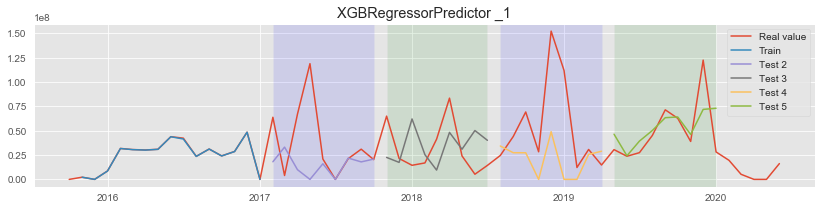

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



        MAPE        MPE           MAE           MSE          RMSE        R2
0        inf       -inf  2.853587e+07  1.439790e+15  3.794456e+07 -0.112517
1  83.860945 -55.669079  1.644455e+07  3.755603e+14  1.937938e+07  0.219358
2  87.044810  -4.234112  4.294988e+07  3.649020e+15  6.040712e+07 -0.786539
3  34.417877  -9.596644  1.657304e+07  5.646783e+14  2.376296e+07  0.410370


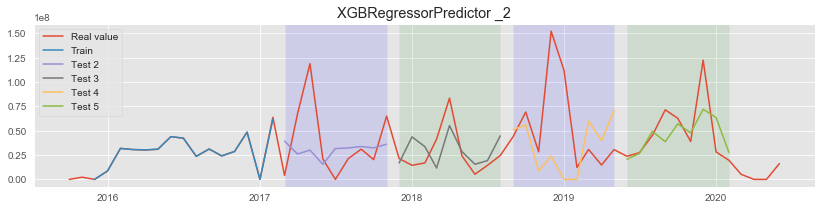

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.646265e+07  1.341215e+15  3.662260e+07 -0.127620
1   89.920568  -59.023441  1.598949e+07  4.452356e+14  2.110061e+07  0.113066
2  108.714145  -60.578817  4.390140e+07  3.835361e+15  6.193029e+07 -0.798830
3  135.493785 -111.735158  2.107972e+07  7.154211e+14  2.674736e+07  0.346731


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.445620e+07  1.021106e+15  3.195475e+07  0.115285
1   39.271589 -14.189727  9.394443e+06  1.964607e+14  1.401644e+07  0.678667
2  127.739574 -70.305183  4.517444e+07  3.665941e+15  6.054701e+07 -0.704706
3         inf       -inf  3.023735e+07  1.281982e+15  3.580478e+07  0.004564


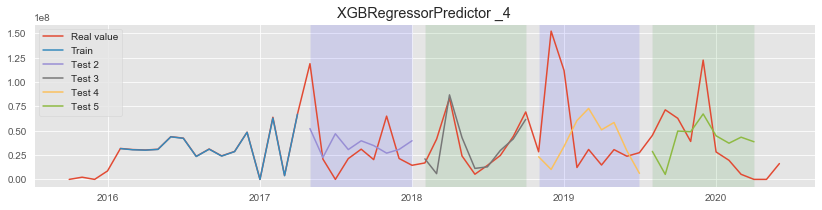

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.046959e+07  6.529942e+14  2.555375e+07 -1.367087
1   49.499287 -10.130317  1.075003e+07  2.087723e+14  1.444896e+07  0.637476
2  173.139596 -79.357644  5.505950e+07  4.186030e+15  6.469954e+07 -0.988634
3         inf       -inf  3.651176e+07  1.849835e+15  4.300971e+07 -0.253772


         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.810004e+07  1.004869e+15  3.169967e+07 -2.291508
1  122.444636  -77.817495  3.132380e+07  1.960665e+15  4.427939e+07 -0.034539
2  187.397060 -133.881020  4.291602e+07  2.170270e+15  4.658615e+07 -1.386981
3         inf        -inf  3.864490e+07  1.895477e+15  4.353708e+07 -0.378458


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



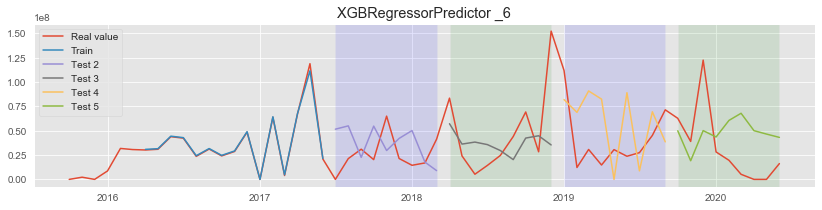

In [24]:

periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)

In [25]:
alName = SVRPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



        MAPE        MPE           MAE           MSE          RMSE        R2
0        inf       -inf  2.648319e+07  1.498848e+15  3.871496e+07 -0.164150
1  96.117123 -61.014049  1.953483e+07  6.361204e+14  2.522143e+07 -0.029724
2  55.823647   0.984394  3.329924e+07  2.731763e+15  5.226627e+07 -0.314303
3  32.606430  17.752899  2.212406e+07  1.232023e+15  3.510018e+07 -0.371817


         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.712783e+07  1.394786e+15  3.734683e+07 -0.077743
1  110.530387 -91.175521  1.773442e+07  4.960447e+14  2.227206e+07 -0.031081
2   55.387650   0.201193  3.272270e+07  2.679377e+15  5.176270e+07 -0.311808
3   39.886134   8.741964  2.324387e+07  1.218368e+15  3.490513e+07 -0.272206


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



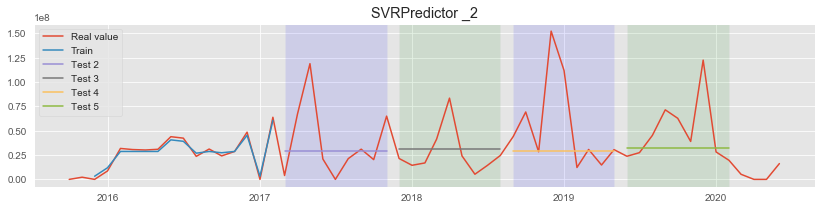

         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.523545e+07  1.322332e+15  3.636388e+07 -0.111744
1  114.660530 -90.531238  1.851375e+07  5.090729e+14  2.256265e+07 -0.014101
2   57.820088 -11.978860  3.188684e+07  2.588553e+15  5.087783e+07 -0.214062
3   96.195121 -49.092985  2.521511e+07  1.271657e+15  3.566030e+07 -0.161182


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



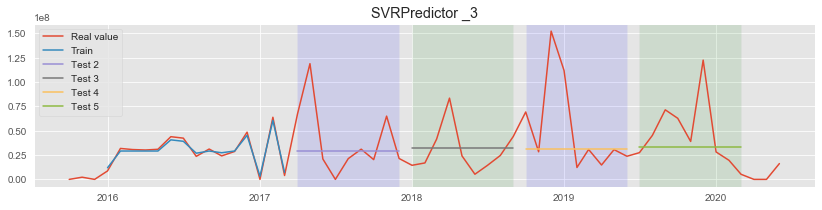

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.517160e+07  1.154319e+15  3.397527e+07 -0.000135
1  107.988963 -72.632757  2.063423e+07  6.208784e+14  2.491743e+07 -0.015514
2   60.919721 -28.014978  2.931480e+07  2.361363e+15  4.859386e+07 -0.098062
3         inf       -inf  2.820108e+07  1.380712e+15  3.715794e+07 -0.072098


C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



        MAPE        MPE           MAE           MSE          RMSE        R2
0        inf       -inf  1.960664e+07  4.540481e+14  2.130840e+07 -0.645912
1  96.984500 -60.523503  1.928523e+07  6.012025e+14  2.451943e+07 -0.043961
2  61.669078 -22.995519  3.002707e+07  2.374784e+15  4.873176e+07 -0.128176
3        inf       -inf  3.079938e+07  1.494379e+15  3.865720e+07 -0.012853


C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  1.793951e+07  4.128442e+14  2.031857e+07 -0.352295
1  104.474283 -55.812665  3.166063e+07  2.185467e+15  4.674897e+07 -0.153155
2   62.294419 -30.372778  2.145017e+07  9.477861e+14  3.078613e+07 -0.042427
3         inf       -inf  2.901455e+07  1.382551e+15  3.718267e+07 -0.005440


C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



In [26]:
periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)

In [27]:
alName = LinearRegressionPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  3.810344e+07  2.702724e+15  5.198773e+07 -1.099197
1  183.497060 -150.553962  3.104203e+07  1.288484e+15  3.589546e+07 -1.085741
2  101.545613   99.023386  4.943077e+07  4.426163e+15  6.652941e+07 -1.129512
3   76.456824  -56.077230  2.928684e+07  1.836103e+15  4.284978e+07 -1.044441


         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  3.761092e+07  2.551748e+15  5.051483e+07 -0.971721
1  135.572559 -108.548569  2.115989e+07  5.804317e+14  2.409215e+07 -0.206489
2  105.978123   28.667809  5.772025e+07  6.153193e+15  7.844229e+07 -2.012568
3   81.668260  -24.096086  3.212909e+07  1.619430e+15  4.024214e+07 -0.690990


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



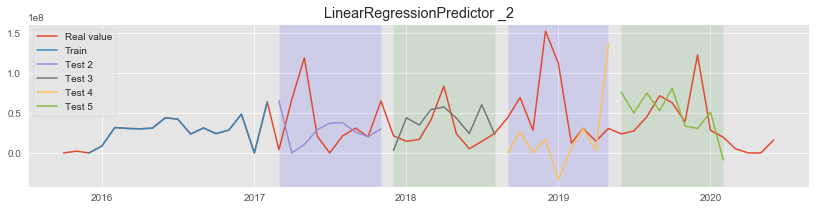

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  3.295125e+07  2.051382e+15  4.529219e+07 -0.724690
1  125.202164 -74.790686  2.306671e+07  6.415438e+14  2.532872e+07 -0.277991
2  112.330179 -57.686590  4.425969e+07  3.511821e+15  5.926062e+07 -0.647086
3   70.585433 -18.728029  2.685258e+07  1.448092e+15  3.805380e+07 -0.322290


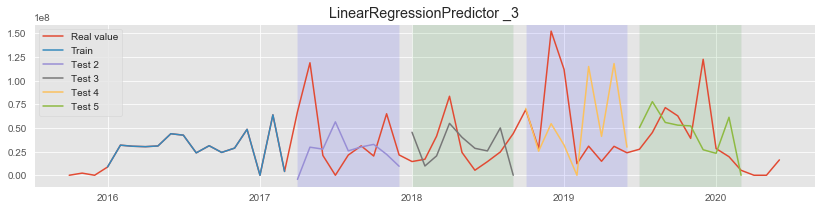

         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.503060e+07  1.129944e+15  3.361464e+07  0.020984
1   96.647968 -57.863888  1.760379e+07  4.824697e+14  2.196519e+07  0.210869
2  120.380953   2.659858  5.425447e+07  5.131399e+15  7.163378e+07 -1.386161
3         inf       -inf  5.856199e+07  5.404463e+15  7.351505e+07 -3.196466


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.244080e+07  7.166359e+14  2.677006e+07 -1.597787
1  112.536619 -79.483288  1.758530e+07  4.465449e+14  2.113161e+07  0.224595
2  157.207713 -77.398040  5.418034e+07  4.639832e+15  6.811631e+07 -1.204219
3         inf       -inf  5.919713e+07  4.848670e+15  6.963239e+07 -2.286306


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



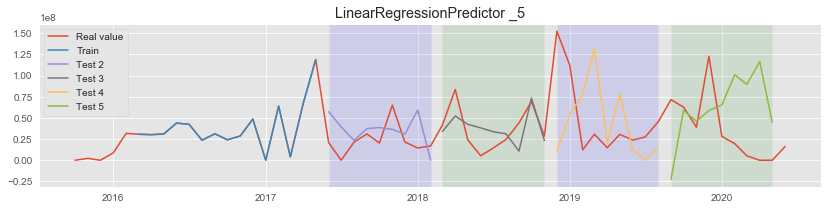

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning:

invalid value encountered in reduce



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  1.780755e+07  4.549280e+14  2.132904e+07 -0.490143
1  115.439375 -73.905519  2.883673e+07  2.210427e+15  4.701518e+07 -0.166325
2  138.132594 -75.221115  3.823477e+07  2.372379e+15  4.870707e+07 -1.609272
3         inf        NaN  2.766164e+07  1.410403e+15  3.755533e+07 -0.025695


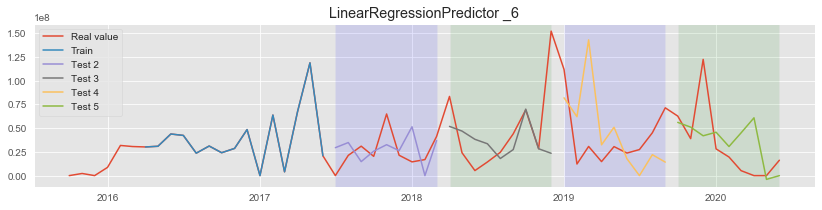

In [28]:

periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)

In [29]:
alName = RandomForestRegressorPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.725212e+07  1.602639e+15  4.003297e+07 -0.244764
1  118.463294 -85.646007  2.136890e+07  6.459092e+14  2.541474e+07 -0.045569
2   59.385310  -5.647217  3.330255e+07  2.631977e+15  5.130280e+07 -0.266295
3   33.393908   7.961919  2.068009e+07  1.005608e+15  3.171132e+07 -0.119712


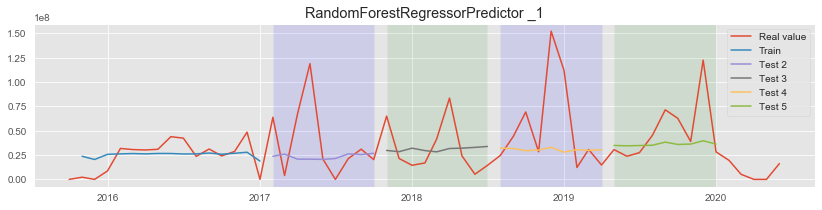

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.786238e+07  1.478037e+15  3.844524e+07 -0.142070
1  124.444883 -105.687732  1.881825e+07  4.853497e+14  2.203065e+07 -0.008851
2   58.721089   -7.475168  3.270377e+07  2.617398e+15  5.116052e+07 -0.281463
3   42.735468   -2.570201  2.212285e+07  1.012814e+15  3.182474e+07 -0.057569


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



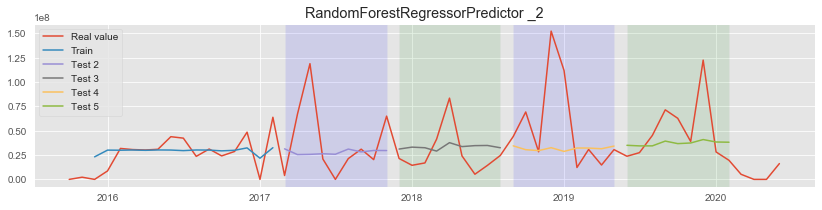

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.538446e+07  1.302738e+15  3.609346e+07 -0.095270
1  113.024748 -89.736317  1.810235e+07  4.437516e+14  2.106541e+07  0.116022
2   62.040346 -16.241859  3.296538e+07  2.610248e+15  5.109059e+07 -0.224237
3  106.710867 -66.846887  2.464370e+07  1.151176e+15  3.392898e+07 -0.051168


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.450006e+07  1.127093e+15  3.357220e+07  0.023455
1  105.731249 -71.490934  2.008417e+07  5.487848e+14  2.342616e+07  0.102403
2   66.195120 -33.175663  3.046224e+07  2.388033e+15  4.886751e+07 -0.110464
3         inf       -inf  2.811180e+07  1.311828e+15  3.621917e+07 -0.018611


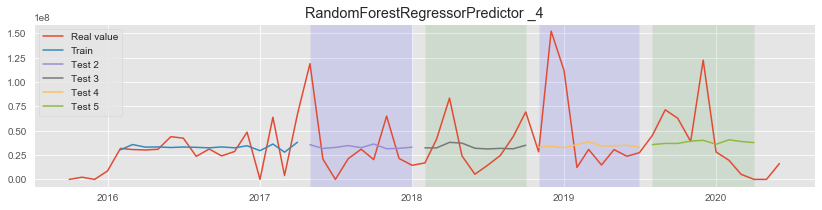

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



        MAPE        MPE           MAE           MSE          RMSE        R2
0        inf       -inf  2.296120e+07  5.770615e+14  2.402210e+07 -1.091833
1  99.892456 -65.503846  1.927575e+07  5.622579e+14  2.371198e+07  0.023665
2  67.569763 -28.629402  3.118545e+07  2.417417e+15  4.916723e+07 -0.148429
3        inf       -inf  3.106461e+07  1.447160e+15  3.804155e+07  0.019152


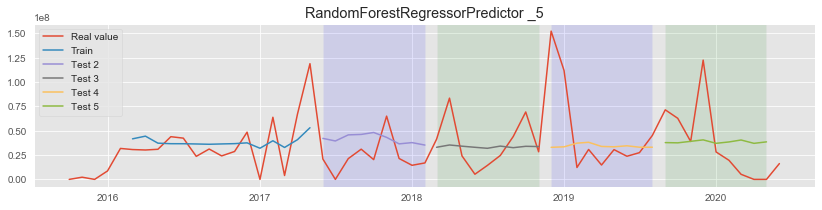

         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  1.978514e+07  4.826601e+14  2.196953e+07 -0.580981
1  105.413340 -59.026886  3.133818e+07  2.133849e+15  4.619360e+07 -0.125919
2   74.855143 -47.397329  2.301216e+07  9.178403e+14  3.029588e+07 -0.009491
3         inf       -inf  2.980480e+07  1.364258e+15  3.693586e+07  0.007864


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



In [30]:

periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)

In [31]:
alName = RNNPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7768 - accuracy: 0.1333 - val_loss: 1.1717 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 0.7741 - accuracy: 0.0667 - val_loss: 1.1719 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.7720 - accuracy: 0.1333 - val_loss: 1.1721 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.7721 - accuracy: 0.1333 - val_loss: 1.1722 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 0.7701 - accuracy: 0.0667 - val_loss: 1.1729 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7692 - accuracy: 0.2000 - val_loss: 1.1738 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7671 - accuracy: 0.0667 - val_loss: 1.1750 - val_accuracy: 0.0000e+00
E

Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9152 - accuracy: 0.1250 - val_loss: 0.4218 - val_accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9157 - accuracy: 0.0417 - val_loss: 0.4211 - val_accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9130 - accuracy: 0.2083 - val_loss: 0.4203 - val_accuracy: 0.0000e+00
Epoch 11/50
1/1 [==============================] - 0s 17ms/step - loss: 0.9096 - accuracy: 0.0417 - val_loss: 0.4195 - val_accuracy: 0.0000e+00
Epoch 12/50
1/1 [==============================] - 0s 14ms/step - loss: 0.9082 - accuracy: 0.1667 - val_loss: 0.4187 - val_accuracy: 0.0000e+00
Epoch 13/50
1/1 [==============================] - 0s 14ms/step - loss: 0.9060 - accuracy: 0.3333 - val_loss: 0.4178 - val_accuracy: 0.0000e+00
Epoch 14/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9019 - accuracy: 0.1667 - val_loss: 0.4168 - val_accuracy: 0.000

Epoch 16/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7612 - accuracy: 0.1837 - val_loss: 1.0170 - val_accuracy: 0.0000e+00
Epoch 17/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7727 - accuracy: 0.0919 - val_loss: 1.0161 - val_accuracy: 0.0000e+00
Epoch 18/50
2/2 [==============================] - 0s 17ms/step - loss: 0.7544 - accuracy: 0.0919 - val_loss: 1.0157 - val_accuracy: 0.0000e+00
Epoch 19/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7583 - accuracy: 0.0306 - val_loss: 1.0155 - val_accuracy: 0.0000e+00
Epoch 20/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7476 - accuracy: 0.1531 - val_loss: 1.0153 - val_accuracy: 0.0000e+00
Epoch 21/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7582 - accuracy: 0.1225 - val_loss: 1.0153 - val_accuracy: 0.0000e+00
Epoch 22/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7658 - accuracy: 0.1121 - val_loss: 1.0152 - val_accuracy: 0.0

2/2 [==============================] - 0s 15ms/step - loss: 0.7129 - accuracy: 0.3527 - val_loss: 1.2195 - val_accuracy: 0.1111
Epoch 24/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7144 - accuracy: 0.3209 - val_loss: 1.2114 - val_accuracy: 0.1111
Epoch 25/50
2/2 [==============================] - 0s 15ms/step - loss: 0.6856 - accuracy: 0.3160 - val_loss: 1.2024 - val_accuracy: 0.1111
Epoch 26/50
2/2 [==============================] - 0s 14ms/step - loss: 0.6659 - accuracy: 0.5104 - val_loss: 1.1933 - val_accuracy: 0.2222
Epoch 27/50
2/2 [==============================] - 0s 15ms/step - loss: 0.6591 - accuracy: 0.4315 - val_loss: 1.1857 - val_accuracy: 0.2222
Epoch 28/50
2/2 [==============================] - 0s 15ms/step - loss: 0.6568 - accuracy: 0.4261 - val_loss: 1.1784 - val_accuracy: 0.2222
Epoch 29/50
2/2 [==============================] - 0s 14ms/step - loss: 0.6511 - accuracy: 0.5050 - val_loss: 1.1734 - val_accuracy: 0.2222
Epoch 30/50
2/2 [===============

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.876304e+07  1.296807e+15  3.601120e+07 -0.007226
1  153.279874 -128.583264  2.379735e+07  6.896811e+14  2.626178e+07 -0.116425
2   71.497146  -24.476166  3.378445e+07  2.437183e+15  4.936783e+07 -0.172575
3   43.462778  -10.599881  2.179993e+07  7.489267e+14  2.736652e+07  0.166095


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



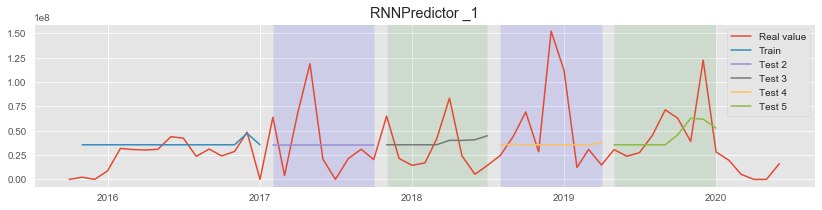

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  3.101974e+07  1.450855e+15  3.809009e+07 -0.121067
1  150.481576 -137.607862  2.145636e+07  5.787617e+14  2.405747e+07 -0.203017
2   72.885415  -27.584349  3.389905e+07  2.365499e+15  4.863640e+07 -0.158135
3   62.627826  -47.757849  2.196482e+07  6.889516e+14  2.624789e+07  0.280605


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



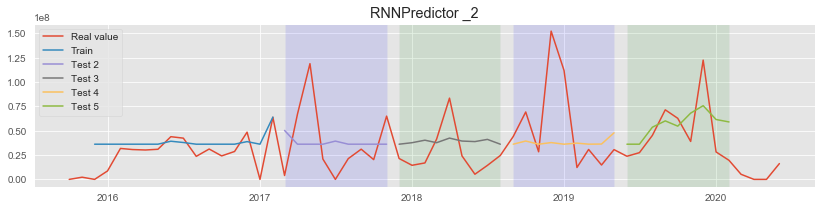

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.737601e+07  1.204210e+15  3.470174e+07 -0.012434
1  141.061564 -127.143249  1.969484e+07  4.749471e+14  2.179328e+07  0.053879
2   73.923589  -31.761460  3.373042e+07  2.382827e+15  4.881421e+07 -0.117574
3  135.537440 -119.097973  2.176851e+07  6.972012e+14  2.640457e+07  0.363368


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



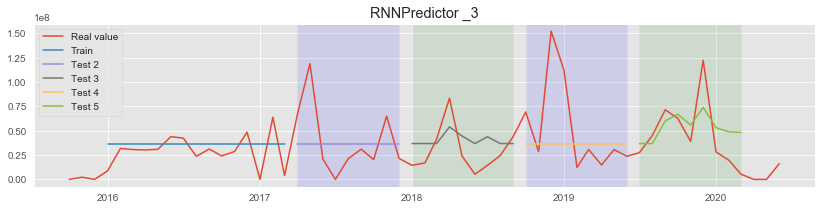

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.547204e+07  9.173872e+14  3.028840e+07  0.205150
1  126.209067 -100.921841  2.078014e+07  5.463561e+14  2.337426e+07  0.106376
2  100.382284  -68.853816  3.730375e+07  2.474983e+15  4.974920e+07 -0.150896
3         inf        -inf  2.428876e+07  8.249997e+14  2.872281e+07  0.359403


         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.009044e+07  4.710415e+14  2.170349e+07 -0.707513
1  121.256163 -94.958083  2.098332e+07  5.949144e+14  2.439087e+07 -0.033042
2   76.647776 -41.328181  3.240275e+07  2.281894e+15  4.776918e+07 -0.084047
3         inf       -inf  3.243239e+07  1.337168e+15  3.656731e+07  0.093701


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



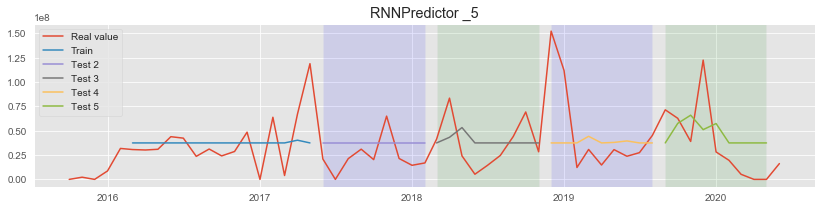

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.076240e+07  5.343384e+14  2.311576e+07 -0.750256
1  122.584377 -80.225630  3.222667e+07  2.037832e+15  4.514235e+07 -0.075256
2   76.690116 -50.149643  2.349063e+07  8.980247e+14  2.996706e+07  0.012303
3         inf       -inf  2.936873e+07  1.381397e+15  3.716714e+07 -0.004600


C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



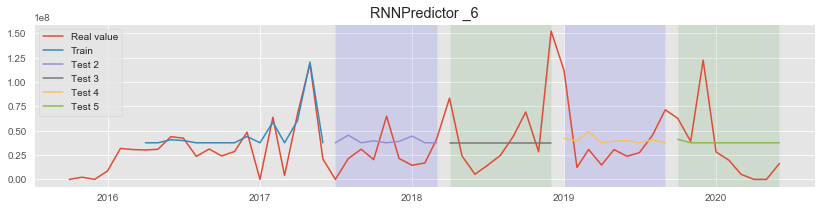

In [32]:
periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)

In [33]:
alName = LSTMPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7858 - accuracy: 0.0000e+00 - val_loss: 1.1607 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 56ms/step - loss: 0.7809 - accuracy: 0.0000e+00 - val_loss: 1.1668 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 50ms/step - loss: 0.7763 - accuracy: 0.0000e+00 - val_loss: 1.1733 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 0.7719 - accuracy: 0.0000e+00 - val_loss: 1.1802 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 0.7677 - accuracy: 0.0667 - val_loss: 1.1876 - val_accuracy: 0.1111
Epoch 6/50
1/1 [==============================] - 0s 49ms/step - loss: 0.7636 - accuracy: 0.2667 - val_loss: 1.1956 - val_accuracy: 0.1111
Epoch 7/50
1/1 [==============================] - 0s 53ms/step - loss: 0.7596 - accuracy: 0.2667 - val_loss: 1.2042 - val_accuracy: 0.11

1/1 [==============================] - 0s 54ms/step - loss: 0.9292 - accuracy: 0.0000e+00 - val_loss: 0.4259 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 54ms/step - loss: 0.9239 - accuracy: 0.0417 - val_loss: 0.4256 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 48ms/step - loss: 0.9191 - accuracy: 0.0833 - val_loss: 0.4253 - val_accuracy: 0.1111
Epoch 6/50
1/1 [==============================] - 0s 54ms/step - loss: 0.9146 - accuracy: 0.2500 - val_loss: 0.4251 - val_accuracy: 0.2222
Epoch 7/50
1/1 [==============================] - 0s 50ms/step - loss: 0.9104 - accuracy: 0.2500 - val_loss: 0.4250 - val_accuracy: 0.1111
Epoch 8/50
1/1 [==============================] - 0s 51ms/step - loss: 0.9065 - accuracy: 0.1250 - val_loss: 0.4249 - val_accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 51ms/step - loss: 0.9029 - accuracy: 0.0417 - val_loss: 0.4249 - val_accuracy: 0.0000e+00
Epoch 10/50
1/1 [=

Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 0.7938 - accuracy: 0.2756 - val_loss: 1.0259 - val_accuracy: 0.1111
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 0.7910 - accuracy: 0.2756 - val_loss: 1.0267 - val_accuracy: 0.1111
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 0.7742 - accuracy: 0.2756 - val_loss: 1.0272 - val_accuracy: 0.1111
Epoch 8/50
2/2 [==============================] - 0s 41ms/step - loss: 0.7884 - accuracy: 0.2449 - val_loss: 1.0277 - val_accuracy: 0.1111
Epoch 9/50
2/2 [==============================] - 0s 45ms/step - loss: 0.7882 - accuracy: 0.2449 - val_loss: 1.0282 - val_accuracy: 0.1111
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 0.7726 - accuracy: 0.2449 - val_loss: 1.0288 - val_accuracy: 0.1111
Epoch 11/50
2/2 [==============================] - 0s 42ms/step - loss: 0.7849 - accuracy: 0.2449 - val_loss: 1.0295 - val_accuracy: 0.1111
Epoch 12/50
2/2 [========

Epoch 7/50
2/2 [==============================] - 0s 47ms/step - loss: 0.8356 - accuracy: 0.0263 - val_loss: 1.2353 - val_accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 46ms/step - loss: 0.8368 - accuracy: 0.0263 - val_loss: 1.2359 - val_accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 45ms/step - loss: 0.8260 - accuracy: 0.0263 - val_loss: 1.2361 - val_accuracy: 0.0000e+00
Epoch 10/50
2/2 [==============================] - 0s 44ms/step - loss: 0.7988 - accuracy: 0.0263 - val_loss: 1.2363 - val_accuracy: 0.0000e+00
Epoch 11/50
2/2 [==============================] - 0s 47ms/step - loss: 0.8280 - accuracy: 0.0159 - val_loss: 1.2365 - val_accuracy: 0.0000e+00
Epoch 12/50
2/2 [==============================] - 0s 46ms/step - loss: 0.8129 - accuracy: 0.0159 - val_loss: 1.2370 - val_accuracy: 0.0000e+00
Epoch 13/50
2/2 [==============================] - 0s 45ms/step - loss: 0.8086 - accuracy: 0.0263 - val_loss: 1.2377 - val_accuracy: 0.0000

         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  3.268019e+07  2.342189e+15  4.839617e+07 -0.819171
1  100.627355 -68.099340  1.955414e+07  6.141171e+14  2.478139e+07  0.005895
2   59.496177  -6.672937  3.313407e+07  2.633457e+15  5.131722e+07 -0.267007
3   35.118794   6.509050  2.145804e+07  1.085533e+15  3.294742e+07 -0.208705


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



        MAPE        MPE           MAE           MSE          RMSE        R2
0        inf       -inf  3.235980e+07  2.143427e+15  4.629716e+07 -0.656214
1  97.202895 -76.248943  1.601803e+07  4.652729e+14  2.157019e+07  0.032881
2  58.392964  -6.580314  3.259894e+07  2.607533e+15  5.106401e+07 -0.276633
3  42.312286   0.529182  2.286413e+07  1.133197e+15  3.366299e+07 -0.183271


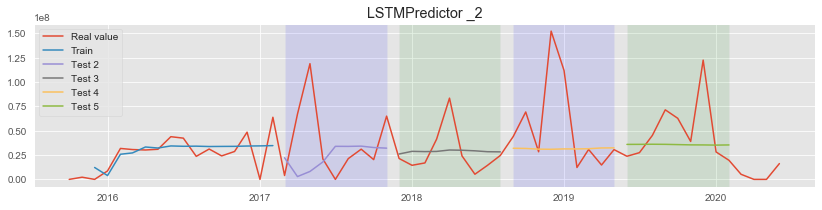

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.523566e+07  1.405413e+15  3.748884e+07 -0.181594
1   98.792311 -69.046403  1.757521e+07  5.161398e+14  2.271871e+07 -0.028179
2   64.392516 -19.947704  3.278270e+07  2.519441e+15  5.019403e+07 -0.181648
3  102.768159 -59.988839  2.497442e+07  1.213621e+15  3.483706e+07 -0.108188


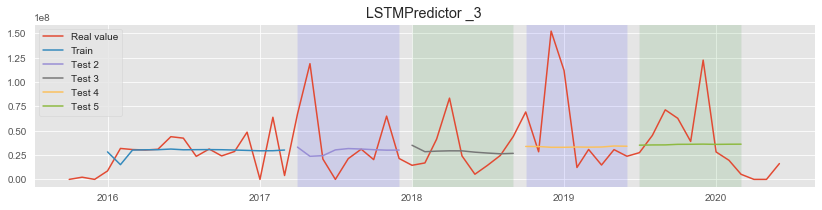

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.179252e+07  1.078706e+15  3.284366e+07  0.065378
1  126.904853 -100.012633  2.106309e+07  6.051242e+14  2.459927e+07  0.010254
2   68.422002  -36.158402  3.058557e+07  2.314999e+15  4.811444e+07 -0.076502
3         inf        -inf  2.779568e+07  1.309654e+15  3.618914e+07 -0.016922


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  1.849753e+07  4.239370e+14  2.058973e+07 -0.536760
1  114.040132 -85.976713  1.984827e+07  5.554033e+14  2.356700e+07  0.035567
2   79.468815 -45.998388  3.214771e+07  2.209937e+15  4.700997e+07 -0.049862
3         inf       -inf  3.154693e+07  1.460551e+15  3.821716e+07  0.010075


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



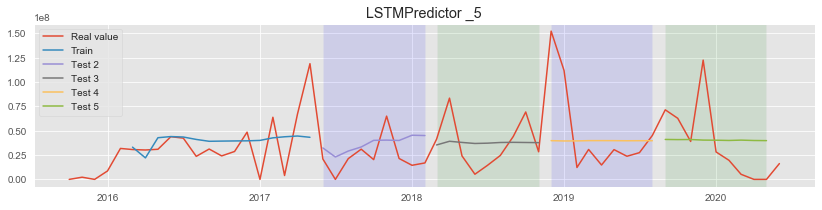

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  1.614689e+07  3.796170e+14  1.948376e+07 -0.243458
1  120.550040 -77.832502  3.220059e+07  2.067952e+15  4.547474e+07 -0.091149
2   79.811328 -54.650429  2.349554e+07  9.020106e+14  3.003349e+07  0.007919
3         inf       -inf  3.073051e+07  1.405813e+15  3.749417e+07 -0.022356


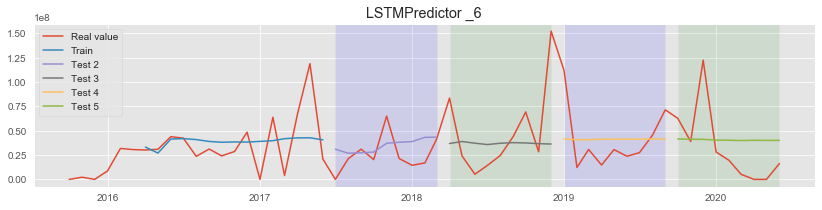

In [34]:
periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)

In [35]:
predictId = 201912
predictedData = pm.predictData(df,xColumns, yColumns,[predictId])

In [36]:
orVal = dfFiltered[dfFiltered.index.isin([predictId])][yColumns]
orVal

y_v_1  y_p_1       y_v_2  y_p_2      y_v_3  y_p_3  y_v_4  y_p_4  \
index                                                                          
201912  28198279.0      1  19600389.0      1  5228457.0      1    0.0      0   

        y_v_5  y_p_5       y_v_6  y_p_6  
index                                    
201912    0.0      0  16232455.0      1

In [37]:
def transform2Column(df, colName = 'value'):
    d = TimeUtilities.mapDate(df.index.values[0])
    colNumbers = list(set([int(i.split('_')[2]) for i in df.columns]))
    colNumbers.sort()
    values = []
    for n in colNumbers:
        p = df['y_p_'+str(n)].values[0]
        p = np.round(p,0)
        v = df['y_v_'+str(n)].values[0]
        values.append(p*v)
    dataPredicted = pd.DataFrame(values, columns = [colName], index=[TimeUtilities.addMonths(d, i+1) for i,v in enumerate(values)])
    return dataPredicted

In [38]:
dfPred = transform2Column(orVal)
for k in predictedData:
    dfPred[k] = transform2Column(scalerService.reverseTransformWithDate(predictedData[k], yColumns), k)
dfPred

value  RNNPredictor  LSTMPredictor  SVRPredictor  \
2020-01-01  28198279.0  5.274139e+07   3.645886e+07  3.183792e+07   
2020-02-01  19600389.0  5.904796e+07   3.540947e+07  3.274520e+07   
2020-03-01   5228457.0  4.834112e+07   3.620128e+07  3.354490e+07   
2020-04-01         0.0  3.736849e+07   3.939298e+07  3.414255e+07   
2020-05-01         0.0  3.747545e+07   3.984731e+07  3.440566e+07   
2020-06-01  16232455.0  3.760897e+07   4.008820e+07  3.535538e+07   

            XGBRegressorPredictor  LinearRegressionPredictor  \
2020-01-01           7.310969e+07               2.208005e+08   
2020-02-01           2.750935e+07              -8.677423e+06   
2020-03-01           5.165063e+07               0.000000e+00   
2020-04-01           3.867597e+07               2.999434e+08   
2020-05-01           2.886312e+07               8.956160e+07   
2020-06-01           4.316065e+07               0.000000e+00   

            RandomForestRegressorPredictor  
2020-01-01                    3.624723e+07  
2020-02-01                    3.820253e+07  
2020-03-01                    3.777956e+07  
2020-04-01                    3.779004e+07  
2020-05-01                    3.855842e+07  
2020-06-01                    3.906589e+07

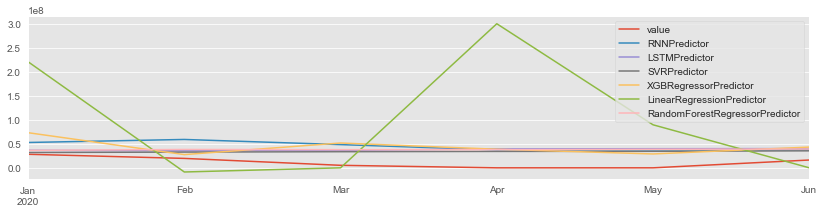

In [39]:
dfPred.plot()

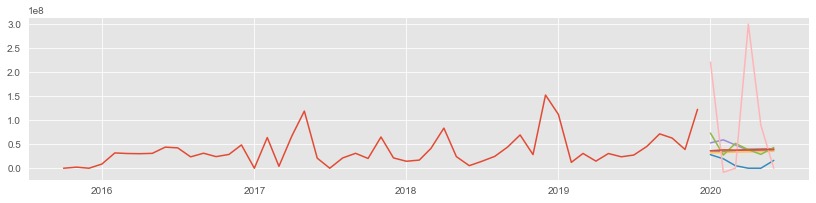

In [40]:
plt.plot(scalerService.reverseTransformWithDate(df.dropna()[['payments_sum']], ['payments_sum']))
for c in dfPred.columns:
    plt.plot(dfPred[c])

In [41]:
__valueChargeBins = [
  {'min':-np.Inf, 'max': 15e6},
  {'min':15e6, 'max': 30e6},
  {'min':30e6, 'max': 60e6},
  {'min':60e6, 'max': np.Inf}
]

__valuePaymentBins = [
  {'min':-np.Inf, 'max': 10e6},
  {'min':10e6, 'max': 20e6},
  {'min':20e6, 'max': 50e6},
  {'min':50e6, 'max': np.Inf}
]

__timeSinceStartBins = [
  {'min':-np.Inf, 'max': 200},
  {'min':200, 'max': 400},
  {'min':400, 'max': 600},
  {'min':600, 'max': 800},
  {'min':800, 'max': np.Inf}
]

__diffBins = [
  {'min':-np.Inf, 'max': 0},
  {'min':0, 'max': 100},
  {'min':100, 'max': 300},
  {'min':300, 'max': 500},
  {'min':500, 'max': np.Inf}
]

In [42]:
import pandas as pd

In [43]:
print('Rangos de los cargos')
pd.DataFrame(__valueChargeBins)[['min','max']]

Rangos de los cargos


min         max
0        -inf  15000000.0
1  15000000.0  30000000.0
2  30000000.0  60000000.0
3  60000000.0         inf

In [44]:
print('Rangos de los abonos')
pd.DataFrame(__valuePaymentBins)[['min','max']]

Rangos de los abonos


min         max
0        -inf  10000000.0
1  10000000.0  20000000.0
2  20000000.0  50000000.0
3  50000000.0         inf

In [45]:
print('Cantidad de días')
print('desde el cargo')
pd.DataFrame(__timeSinceStartBins)[['min','max']]

Cantidad de días
desde el cargo


min    max
0   -inf  200.0
1  200.0  400.0
2  400.0  600.0
3  600.0  800.0
4  800.0    inf

In [46]:
print('Rangos de la cantidad de días')
print('desde la transacción anterior')
pd.DataFrame(__diffBins)[['min','max']]

Rangos de la cantidad de días
desde la transacción anterior


min    max
0   -inf    0.0
1    0.0  100.0
2  100.0  300.0
3  300.0  500.0
4  500.0    inf